In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 9
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bering['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((473, 12, 1), (473,))

In [8]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bering_model_LT9/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
42/48 [=========================>....] - ETA: 0s - loss: 0.1473 - root_mean_squared_error: 0.3838

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 6s 83ms/step - loss: 0.1416 - root_mean_squared_error: 0.3763 - val_loss: 0.0524 - val_root_mean_squared_error: 0.2290
Epoch 2/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0953 - root_mean_squared_error: 0.3086

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 61ms/step - loss: 0.0934 - root_mean_squared_error: 0.3056 - val_loss: 0.0461 - val_root_mean_squared_error: 0.2147
Epoch 3/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0770 - root_mean_squared_error: 0.2776

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 69ms/step - loss: 0.0752 - root_mean_squared_error: 0.2742 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1995
Epoch 4/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0654 - root_mean_squared_error: 0.2558

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 73ms/step - loss: 0.0629 - root_mean_squared_error: 0.2508 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1863
Epoch 5/50
44/48 [==========================>...] - ETA: 0s - loss: 0.0492 - root_mean_squared_error: 0.2217

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 60ms/step - loss: 0.0514 - root_mean_squared_error: 0.2268 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1764
Epoch 6/50
44/48 [==========================>...] - ETA: 0s - loss: 0.0450 - root_mean_squared_error: 0.2120

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 58ms/step - loss: 0.0433 - root_mean_squared_error: 0.2081 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1671
Epoch 7/50
42/48 [=========================>....] - ETA: 0s - loss: 0.0319 - root_mean_squared_error: 0.1786

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 63ms/step - loss: 0.0328 - root_mean_squared_error: 0.1811 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1590
Epoch 8/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.1649

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 55ms/step - loss: 0.0287 - root_mean_squared_error: 0.1695 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1532
Epoch 9/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0279 - root_mean_squared_error: 0.1669

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 58ms/step - loss: 0.0268 - root_mean_squared_error: 0.1637 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 10/50
39/48 [=======================>......] - ETA: 0s - loss: 0.0211 - root_mean_squared_error: 0.1451

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 73ms/step - loss: 0.0216 - root_mean_squared_error: 0.1471 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1421
Epoch 11/50
39/48 [=======================>......] - ETA: 0s - loss: 0.0243 - root_mean_squared_error: 0.1559

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 60ms/step - loss: 0.0253 - root_mean_squared_error: 0.1589 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1378
Epoch 12/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1397
Epoch 13/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0214 - root_mean_squared_error: 0.1464

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 70ms/step - loss: 0.0210 - root_mean_squared_error: 0.1450 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1277
Epoch 14/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0213 - root_mean_squared_error: 0.1461 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1360
Epoch 15/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0196 - root_mean_squared_error: 0.1402 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1358
Epoch 16/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0174 - root_mean_squared_error: 0.1319 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1512
Epoch 17/50
45/48 [===========================>..] - ETA: 0s - loss: 0.0209 - root_mean_squared_error: 0.1445

INFO:tensorflow:Assets written to: Bering_model_LT9\assets


INFO:tensorflow:Assets written to: Bering_model_LT9\assets


48/48 [==============================] - 3s 57ms/step - loss: 0.0205 - root_mean_squared_error: 0.1432 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1244
Epoch 18/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0201 - root_mean_squared_error: 0.1418 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1604
Epoch 19/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1622
Epoch 20/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0187 - root_mean_squared_error: 0.1369 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1609
Epoch 21/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0153 - root_mean_squared_error: 0.1236 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1471
Epoch 22/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0167 - root_mean_squared_error: 0.1293 - val_loss: 0.0297 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

0.8365910450617472 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

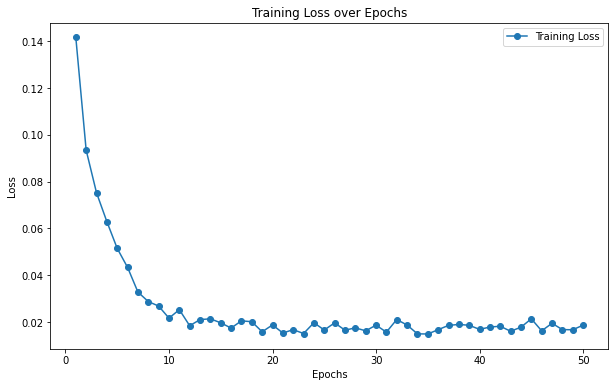

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

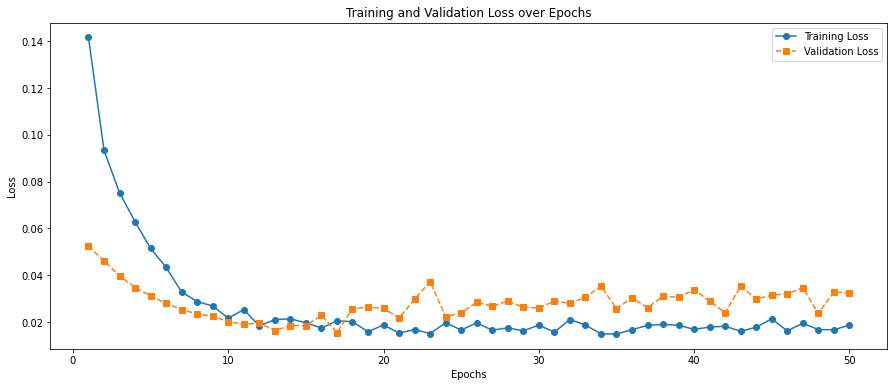

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model_LT9/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 17ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.09661020102753959
MAE : 0.0730318282184532


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,552353.187500,708542.184
1,506810.812500,652598.000
2,333812.281250,414216.785
3,212579.500000,236263.303
4,121002.421875,43422.368
5,92531.679688,2161.744
6,98990.632812,944.181
7,188373.937500,13977.643
8,266171.625000,24795.001
9,424039.375000,168828.990


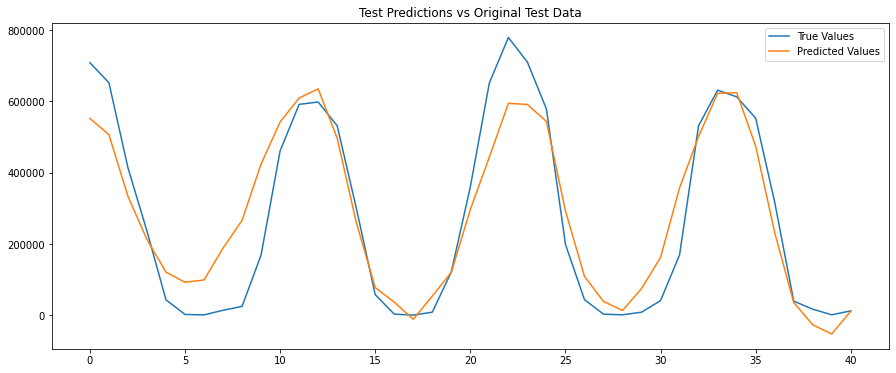

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

15/15 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

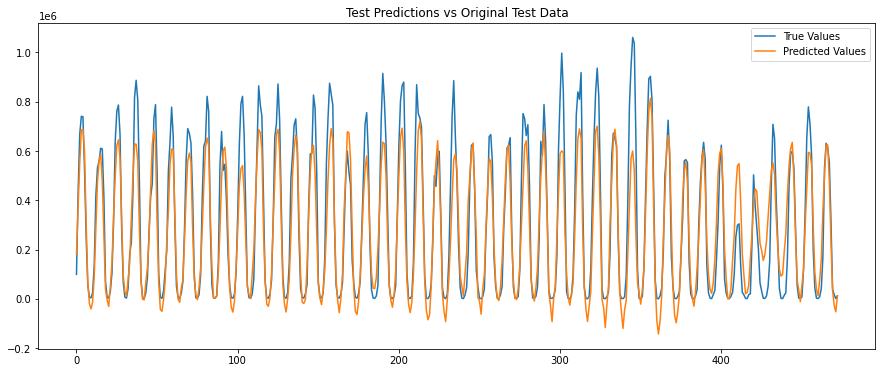

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()